# K-Means

K-Means należy do grupy algorytmów nienadzorowanych. Jego zadaniem jest nadanie każdemu z punktów zbioru danych etykeity, przyporządkowującej go do jednej z grup - klastrów. Punkty znajdujace się wewnątrz tego samego klastra są bardziej podobne do siebie nawzajem nież do punktów z poza klastra. Załóżmy, że mamy zbiór danych $X = \left \{ x_{1}, ... , x_{N} \right \}$, który zawiera $N$ D-wymiarowych obserwacji. Dane jest również $K$ stanowiące liczbę klastró na jakie chcemy podzielić dane. Każdy z kalstrów reprezentowany jest przez centroid $\mu _{k}$, zlokalizowany w "środku cieżkości klastra". Celem KMeans jest zminimalizowanie wartości funkcji $J$ zwanej inercją, która opisana jest poniższym wzorem: 

$$ J(r,\mu ) = \sum_{i}^{N} \sum_{k}^{K} r_{ik}\left \| x_{i} - \mu _{k} \right \|_{2}^{2} $$

Gdzie:

- $N$ - suma wszystkich punktów
- $K$ - suma wszystkich kalstrów
- $r_{ik}$ - binarny wskaźnik wskazujący czy $i-ty$ punkt należy do $k-tego$ klastra. Wskaźnik ma wartość 1, jeżli odległość $k-tego$ kalstra do $i-tego$ punkto jest najmniejsza spośród wszystkich klastrów oraz wartosć 0 w innym przypadku.

$r_{ik} = \left\{\begin{matrix}1, k=arg min_{j}\left \| x_{i} - \mu _{j} \right \|^{2} \\ 0, \end{matrix}\right.$

Analityczna minimalizacja inercji jest bardzo skomplikowanym zagadnieniem. KMeans rozwiazuje ten problem iteracyjnie. Najczęściej KMeans jest rozwiazywane przy pomocy algorytmu Lloyd'a:

1. Wybierz K - ilość poszukiwanych klastrów.
2. Wybierz K losowych punktów  - centroidów (nie koniecznie z analizowanego zbioru danych)
3. Przypisz każdy z punktów do najbliższego centroidu, w ten sposób uformuje się K klastrów.
4. Oblicz współrzędne nowych centroidow dla każdego klastra.
5. Przypisz każdy punkt ze zbioru danych do najbliższego centroidu. Jeżeli nastąpiło jakieś przesunięcie centroid powrót do 4, w przeciwnym wypadku zakończ.

### 1. Import i wstępna obróbka danych

In [10]:
import numpy as np
import pandas as pd

In [11]:
dataset = pd.read_csv('Mall_Customers.csv')

In [12]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Analizę przeprowadzimy w oparciu o dwie ostatnie kolumny zbioru danych: Annual Income (k$) oraz Spending Score (1-100).

In [13]:
X = dataset.iloc[:, [3, 4]].values

### 2. Wizualizacja danych wejściowych przy użyciu biblioteki seaborn

Przed przystąpieniem do analizy zbioru danych za pomocą KMeans dobrą praktyką jest stworzenie wykresu opisującego analizowany zbiór danych (o ile jest to możliwe).

In [15]:
import seaborn as sns
%matplotlib inline
# Utworzony wykres pojawia sie wewnątrz zeszytu

In [19]:
sns.set()
# Ustawiamy domyślne parametry estetyczne wykresu

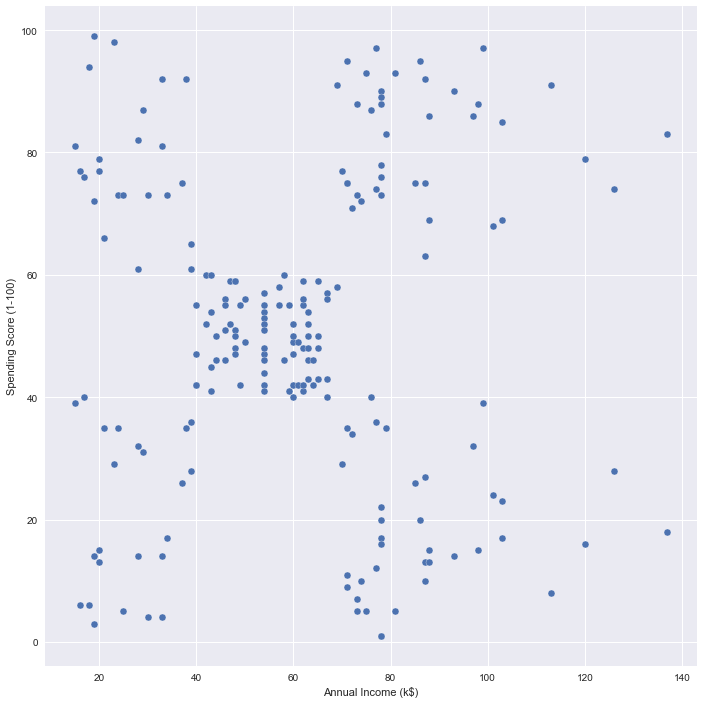

In [18]:
sns.pairplot(data=dataset, x_vars='Annual Income (k$)', y_vars='Spending Score (1-100)', size=10)

Wybrny zbiór danych jest mało skomplikowany i już na pierwszy rzut oka widać, że najprawdopodobniej najlepszym wyborem liczby poszukiwanych klastrów jest K = 5.

### 3. Poprawny wybór centroid

Wybór ilości klastrów oraz wstępnej lokalizacji powiązanych z nimi centroid ma kluczowe znaczenie na poprawność oraz szybkość uzyskania końcowego wyniku. KMean z biblioteki sklearn pozwala wybrać wstępną lokalizację centroid na trzy sposoby: losowo, poprzez podanie listy punktów oraz przy pomocy algorytmu k-means++. Błędny wybur punktów startowych może spowodować tak zwane "Initialization Trap" co w rezultacie może doprowadzić między innymi do błędnego pdziału. Aby rozwiązać ten problem, zawarte w bibliotece sklearn KMeans, domyślnie stosuje algorytm L-Means++, który dąrzy do jak największego rozproszenia centroid.

1. Wybierz losowo pierwszą centroidą $c_{1}$.
2. Dla każdeg punktu obliczamy odległość do najbliższej centroidy.
2. W kolejnych iteracjach dla $2 \leq i \leq k$ wybieramy centroidę $c_{i}$ kierując się następującymi zasadą: Prawdopodobieństwo wybrania punktu jako kolejnej centroidy, jest proporcjonalne do kwadratu jego odległosci do juz wybranych centroid.